# Condensed summary of Live Examples shown in all 3 classes

I got carried away a little... examples are more "complex" than during the course, hopefully also more informative :-)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Line Plots

Also refer to the examles in `slide-figures.ipynb` where all the Figures for this course's slides were created.

### Clipping - one of many more options

By default, graphs are not drawn outside of the Axes area. This area, or more precisely the x- and y-limits are set automatically to show everything.

However, you can set your own limits. And if you _really_ want a graph to extend beyond the limits, that is possible, too.

(0.8, 4.5)

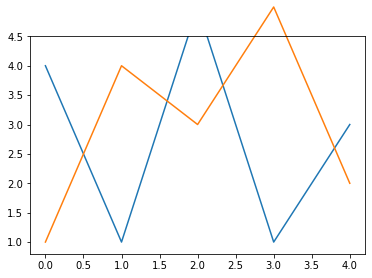

In [2]:
fig, ax = plt.subplots()
# A clipped graph (default)
ax.plot([4, 1, 5, 1, 3])
# A non-clipped graph
ax.plot([1, 4, 3, 5, 2], clip_on = False)
# Set the upper y-limit, to see the effect:
ax.set_ylim(top = 4.5)

### Multiple Lines from a Matrix (2D NumPy array)

Often, you can have bunch of datasets that you all want to plot together.

To be plotted "in one step", these datasets should be organized as follows:

* `y`-values are stored in a matrix (a 2D Numpy array)
* Each __column__ of `y` represents one dataset of length `n`
* `x`-values can be one of:
    1. a vector (1D array) with a length equal to the number of __rows__ in `y`
    2. a "column vector" (2D array) with a single column (shape: `n`&times;`1`)
    3. a matrix (2D array) of the same shape as `y`

First, we generate a small dataset that fits our needs. You can control the number of datasets and the number of points per dataset by changing `n` and `m`, respectively.

`x`-values will range from 0 to 4&pi; (two cycles)  
`y`-values will be random numbers between 0 and 1, multiplied by 20*sin(x)

That gives a set of curves that follow 

In [3]:
# Reproducible random numbers:
np.random.seed(1234)
n = 6  # number of datasets
m = 21 # length of each dataset
x = np.linspace(0, 4*np.pi, num=m)
# The `reshape` of x is necessary to make the multiplication of sin(x) and the (m x n) matrix work
y = (np.random.rand(m, n) * 20 * np.sin(x).reshape((-1, 1)))
print("x:")
display(x)
print("y (rounded):")
display(np.round(y))

x:


array([ 0.        ,  0.62831853,  1.25663706,  1.88495559,  2.51327412,
        3.14159265,  3.76991118,  4.39822972,  5.02654825,  5.65486678,
        6.28318531,  6.91150384,  7.53982237,  8.1681409 ,  8.79645943,
        9.42477796, 10.05309649, 10.68141502, 11.30973355, 11.93805208,
       12.56637061])

y (rounded):


array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  3.,   9.,  11.,  10.,   4.,   6.],
       [ 13.,  14.,   7.,  11.,  10.,   0.],
       [ 15.,  17.,   7.,  12.,   1.,   7.],
       [ 11.,   8.,   5.,   9.,   4.,   7.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [ -3., -11.,  -5., -11.,  -1.,  -2.],
       [ -1., -13., -11., -10.,  -1., -11.],
       [ -6., -10.,  -2., -12., -11.,  -0.],
       [ -7., -11.,  -9., -12., -11.,  -9.],
       [ -0.,  -0.,  -0.,  -0.,  -0.,  -0.],
       [  5.,  12.,   1.,   1.,   9.,   7.],
       [  9.,   2.,   4.,  17.,   8.,  10.],
       [  0.,   6.,   8.,  12.,  17.,  12.],
       [  8.,   2.,   9.,  10.,   7.,   5.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [ -6., -10.,  -1.,  -8.,  -9.,  -8.],
       [-15., -11., -18.,  -3.,  -1., -11.],
       [ -2., -18.,  -6.,  -4.,  -9., -18.],
       [-10.,  -3.,  -4.,  -2., -11.,  -8.],
       [ -0.,  -0.,  -0.,  -0.,  -0.,  -0.]])

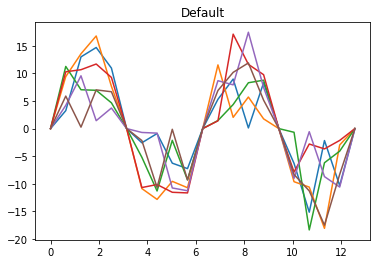

In [4]:
fig, ax = plt.subplots()
ax.set_title("Default")
ax.plot(x, y)

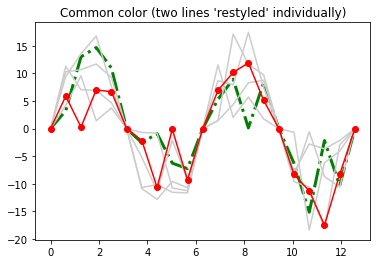

In [5]:
fig, ax = plt.subplots()
ax.set_title("Common color (two lines 'restyled' individually)")
lines = ax.plot(x, y, '-', c='.8')
# The first line:
lines[0].set_color('green')
lines[0].set_linewidth(3)
lines[0].set_linestyle('-.')
# The last line:
lines[-1].set_color('red')
lines[-1].set_marker('o')

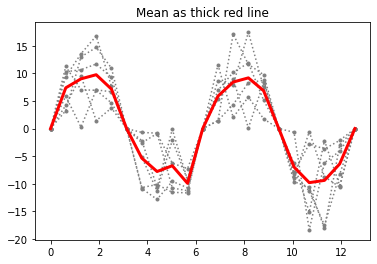

In [6]:
fig, ax = plt.subplots()
ax.set_title("Mean as thick red line")
lines = ax.plot(x, y, '.:', c='.5')
ax.plot(x, np.mean(y, axis=1), '-r', lw=3)

## Errorbars

Working on the same dataset as before... Just copied the code here, in case you have changed it.

In [7]:
# Reproducible random numbers:
np.random.seed(1234)
n = 6  # number of datasets
m = 21 # length of each dataset
x = np.linspace(0, 4*np.pi, num=m)
# The `reshape` of x is necessary to make the multiplication of sin(x) and the (m x n) matrix work
y = (np.random.rand(m, n) * 20 * np.sin(x).reshape((-1, 1)))

In [8]:
# Calculate mean values along rows (mean of datasets at same x):
means = np.mean(y, axis=1)
# Calculate standard deviation:
stds = np.std(y, axis=1)
print("mean of y:")
display(means)
print("std of y:")
display(stds)


mean of y:


array([ 0.00000000e+00,  7.38889326e+00,  9.01748521e+00,  9.76403828e+00,
        7.16193943e+00,  1.49409259e-15, -5.36689620e+00, -7.78258521e+00,
       -6.73484968e+00, -9.91973056e+00, -1.64929534e-15,  5.88334525e+00,
        8.43443936e+00,  9.19299832e+00,  6.86716825e+00,  3.89872943e-15,
       -6.97083848e+00, -9.79956568e+00, -9.39141640e+00, -6.40804786e+00,
       -5.62943255e-15])

std of y:


array([0.00000000e+00, 3.08572783e+00, 4.47353461e+00, 5.20256880e+00,
       2.49863410e+00, 6.07806182e-16, 4.05127248e+00, 4.96219299e+00,
       4.33051902e+00, 1.49197268e+00, 9.11338570e-16, 3.67219294e+00,
       4.77085147e+00, 5.43108252e+00, 2.69082793e+00, 1.70946055e-15,
       3.00057514e+00, 6.31638639e+00, 6.28323806e+00, 3.46289138e+00,
       2.62573284e-15])

<ErrorbarContainer object of 3 artists>

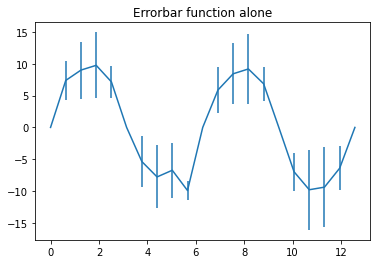

In [9]:
fig, ax = plt.subplots()
ax.set_title("Errorbar function alone")
ax.errorbar(x, means, yerr=stds)

<ErrorbarContainer object of 3 artists>

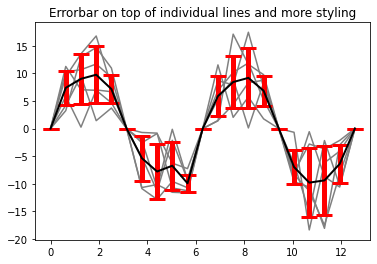

In [10]:
fig, ax = plt.subplots()
ax.set_title("Errorbar on top of individual lines and more styling")
# Individual lines (zorder to show it behind the errorbars):
lines = ax.plot(x, y, '-', c='.5', zorder=-1)
# Mean with errorbars:
ax.errorbar(x, means, yerr=stds, color='black',
            linewidth=2, ecolor='red', elinewidth=5,
            capsize=8, capthick=3,
)

## Errorbars for a bar plot

<ErrorbarContainer object of 3 artists>

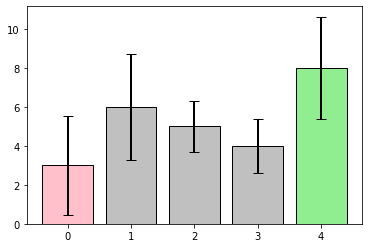

In [11]:
np.random.seed(1234)
n_bars = 5

x_bar = np.arange(n_bars)
y_bar = np.random.randint(0,10, size=n_bars)
y_bar_err = np.random.rand(n_bars) * 2 + 1

fig, ax = plt.subplots()
# Plot the bars first:
h = ax.bar(x_bar, y_bar, color='silver', edgecolor='black')
h[0].set_facecolor('pink')
h[4].set_facecolor('lightgreen')
# Then the errorbars with no connecting line:
ax.errorbar(x_bar, y_bar, yerr = y_bar_err, color='black', linestyle='None', linewidth=2, capsize=5)

Often, you see errorbars on bar plots (rarely on other plots) only in one direction.

You can achieve that by two methods:

* Use a 2D matrix for `yerr`, see documentation for details
* Just "hide" the lower half of the errorbar 

Below, both alternatives are shown in subplots.

<ErrorbarContainer object of 3 artists>

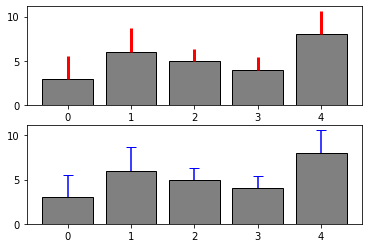

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1)

bars1 = ax1.bar(x_bar, y_bar, color='gray', edgecolor='black')
ax1.errorbar(x_bar, y_bar, yerr = [np.zeros_like(y_bar_err), y_bar_err], color='red', lw=3, ls='None')

bars2 = ax2.bar(x_bar, y_bar, color='gray', edgecolor='black')
ax2.errorbar(x_bar, y_bar, yerr = y_bar_err, color='blue', ls='None', capsize=5, zorder=-10)

# To see the "hidden" parts for some bars, uncomment the following lines
# ax1.set_facecolor('lightgreen')
# bars1[1].set_facecolor('white')
# bars1[2].set_facecolor('None')
# ax2.set_facecolor('lightgreen')
# bars2[1].set_facecolor('white')
# bars2[2].set_facecolor('None')


## Scatter Plots

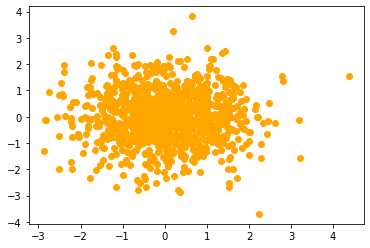

In [13]:
x = np.random.randn(1000)
y = np.random.randn(1000)

fig, ax = plt.subplots()
ax.scatter(x, y, color='orange')

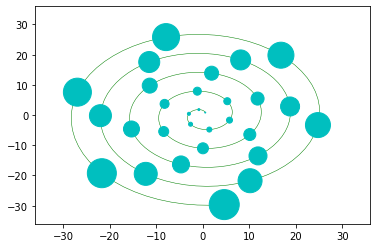

In [14]:
n_min = 1
n_max = 30
s = np.arange(n_min, n_max + 1)
x = np.cos(s) * s
y = np.sin(s) * s

fig, ax = plt.subplots()

ax.scatter(x, y, s=s*s, color='c', marker='o')

ax.set_xlim(-1.2*n_max, 1.2*n_max)
ax.set_ylim(-1.2*n_max, 1.2*n_max)

# A smooth(er) line along the spiral:
ss = np.linspace(s[0], s[-1], num=s.size*10)
ax.plot(np.cos(ss) * ss, np.sin(ss) * ss, '-', color='green', lw=.5, zorder=-10)

# To write the actual size of each marker, uncomment the following lines
# for k in range(s.size):
#     ax.text(x[k], y[k], s[k] * s[k], ha='center', va='center')

[]

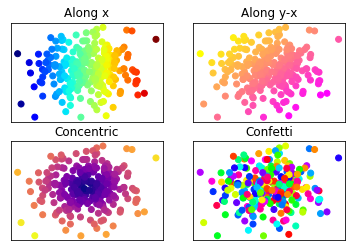

In [15]:
x = np.random.randn(250)
y = np.random.randn(250)

fig, axs = plt.subplots(2, 2)

axs[0,0].set_title('Along x')
axs[0,0].scatter(x, y, c = x, marker='o', cmap='jet')

axs[0,1].set_title('Along y-x')
axs[0,1].scatter(x, y, c = y-x, marker='o', cmap='spring')

axs[1,0].set_title('Concentric')
axs[1,0].scatter(x, y, c = np.sqrt(x*x+y*y), marker='o', cmap='plasma')

axs[1,1].set_title('Confetti')
axs[1,1].scatter(x, y, c = np.random.rand(*x.shape), marker='o', cmap='hsv')

plt.setp(axs, xticks=[], yticks=[])

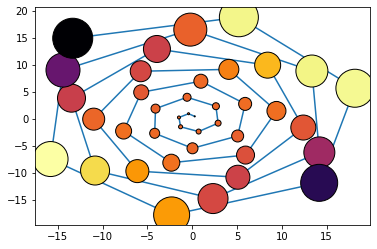

In [16]:
fig, ax = plt.subplots()

n_max = 40
s = (np.arange(n_max) + 1)
x = np.cos(s) * s/2
y = np.sin(s) * s/2

ax.scatter(x, y, s=s*s, c=s*x*y, cmap='inferno', edgecolors='k')

ax.plot(x, y, zorder=-10)

## Histograms

Text(0.5, 1.0, 'With exactly defined bins')

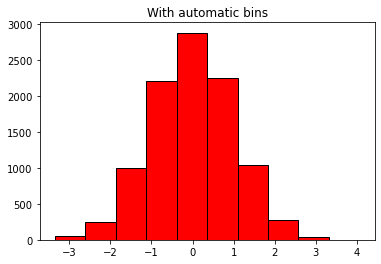

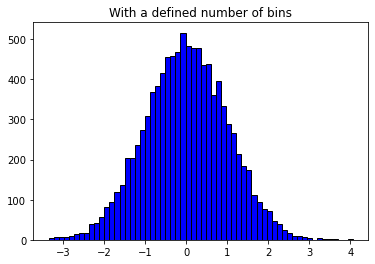

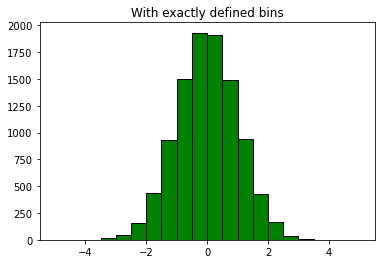

In [17]:

n = np.random.randn(10000)

fig, ax = plt.subplots()
ax.hist(n, color='red', edgecolor='black')
ax.set_title("With automatic bins")

fig, ax = plt.subplots()
ax.hist(n, bins=60, color='blue', edgecolor='black')
ax.set_title("With a defined number of bins")

fig, ax = plt.subplots()
ax.hist(n, bins=np.linspace(-5, 5, 21), color='green', edgecolor='black')
ax.set_title("With exactly defined bins")


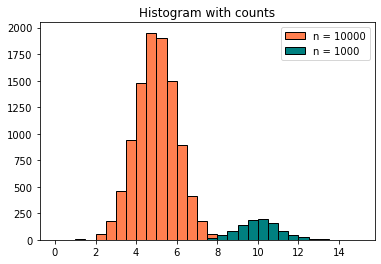

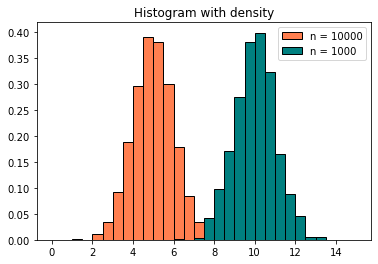

In [18]:

n1 = np.random.randn(10000) + 5
n2 = np.random.randn(1000) + 10

fig, ax = plt.subplots()
ax.set_title("Histogram with counts")
ax.hist(n1, bins=np.linspace(0, 15, 31), color='coral', edgecolor='black', label=f"n = {n1.size}")
ax.hist(n2, bins=np.linspace(0, 15, 31), color='teal', edgecolor='black', label=f"n = {n2.size}")
ax.legend()

fig, ax = plt.subplots()
ax.set_title("Histogram with density")
ax.hist(n1, bins=np.linspace(0, 15, 31), density=True, color='coral', edgecolor='black', label=f"n = {n1.size}")
ax.hist(n2, bins=np.linspace(0, 15, 31), density=True, color='teal', edgecolor='black', label=f"n = {n2.size}")
ax.legend()


### Histogram using `np.histogram()` and `bar()`-plots

As an alternative to the matplotlib `hist()` functions, it can be helpful to break the calculation and the presentation down.

`hist()` uses `np.histogram()` internally anyways.

__A possible scenario:__

You have two datasets (e.g. populations), `p1` and `p2`, with different numbers of elements. You want to show a histogram of the "combined density", i.e. where each value represents the percentage/fraction of the entire population. Or put otherwise, the every "count" of a histogram should be divided by `n_total = len(p1) + len(p2)`).

In [19]:
# Creating the dataset:
np.random.seed(100)
p1 = np.random.randn(2000) * 1.5 + 6
p2 = np.random.randn(1000) + 10

bins = np.linspace(0, 15, 31)
bin_width = bins[1] - bins[0]

Text(0.5, 1.0, "Using matplotlib's hist() function, density=True")

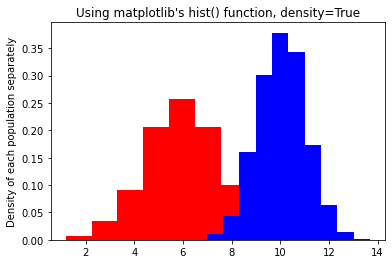

In [20]:
# for comparison, let's just plot "standard histograms" together in one figure...
# You will see that there are some issues. Adding bins=bins would improve the plot,
# but still not show what we want...
fig0, ax0 = plt.subplots()
ax0.hist(p1, density=True, color="red")
ax0.hist(p2, density=True, color="blue")
ax0.set_ylabel("Density of each population separately")
ax0.set_title("Using matplotlib's hist() function, density=True")

Text(0, 0.5, 'Fraction of the entire population')

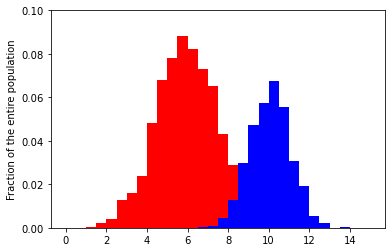

In [21]:
# Calculate histogram counts for each population:
counts1, edges1 = np.histogram(p1, bins=bins)
counts2, edges2 = np.histogram(p2, bins=bins)
# Note: bins, edges1 and edges2 are now identical arrays!

# Normalize both counts-arrays by the total number of elements:
n_total = p1.size + p2.size
counts1_norm = counts1 / n_total
counts2_norm = counts2 / n_total

fig, ax = plt.subplots()
ax.set_ylim(0, 0.1)
# In order to make a hist-like plot with bar(), we need to define the `width` of the bars and `align='edge'`:
ax.bar(edges1[:-1], counts1_norm, width=bin_width, align='edge', color='red')
ax.bar(edges2[:-1], counts2_norm, width=bin_width, align='edge', color='blue')
ax.set_ylabel("Fraction of the entire population")


Text(0, 0.5, 'Fraction of the entire population')

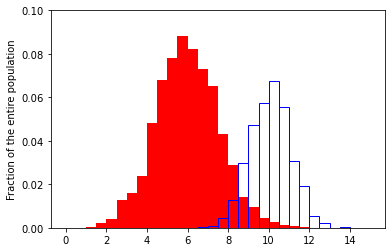

In [22]:
# Note how the red histogram is partially hidden by the blue,
# to show that, let's change the styles a bit.
fig, ax = plt.subplots()
ax.set_ylim(0, 0.1)
# In order to make a hist-like plot with bar(), we need to define the `width` of the bars and `align='edge'`:
ax.bar(edges1[:-1], counts1_norm, width=bin_width, align='edge', color='red')
ax.bar(edges2[:-1], counts2_norm, width=bin_width, align='edge', edgecolor='blue', facecolor='none')
ax.set_ylabel("Fraction of the entire population")


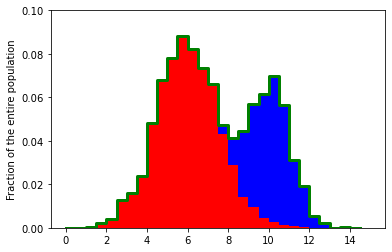

In [23]:
# We can easily "stack" histograms, too. Note the `bottom=...` in second call

fig, ax = plt.subplots()
ax.set_ylim(0, 0.1)
# In order to make a hist-like plot with bar(), we need to define the `width` of the bars and `align='edge'`:
ax.bar(edges1[:-1], counts1_norm, width=bin_width, align='edge', color='red')
ax.bar(edges2[:-1], counts2_norm, width=bin_width, bottom=counts1_norm, align='edge', color='blue')
ax.set_ylabel("Fraction of the entire population")

# The outline of the stacked plot is exactly the histogram of the entire population
p_total = np.concatenate((p1, p2))
counts_total, edges_total = np.histogram(p_total, bins=bins)
counts_total_norm = counts_total / p_total.size
ax.step(edges_total[:-1], counts_total_norm, where='post', color='green', linewidth=3)


Text(0, 0.5, 'Fraction of the entire population')

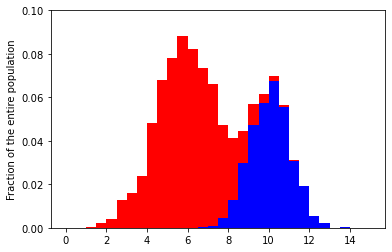

In [24]:
# Just for fun, same plot but stacked in a different order

fig, ax = plt.subplots()
ax.set_ylim(0, 0.1)
# In order to make a hist-like plot with bar(), we need to define the `width` of the bars and `align='edge'`:
ax.bar(edges1[:-1], counts1_norm, width=bin_width, bottom=counts2_norm, align='edge', color='red')
ax.bar(edges2[:-1], counts2_norm, width=bin_width, align='edge', color='blue')
ax.set_ylabel("Fraction of the entire population")
